## Police Killings

The Guardian launched “The Counted,” an impressive interactive database of Americans killed by police since the start of the year. It started in 2015, but you can check the recent stats for 2016. We will explore the data by race, income and state.

### Assignment

- Import the data and examine the head and columns
- Get the total counts for each racial grouping
- Find the relative % for each racial grouping
- How do the killings compare with the overall US breakdown of population by race?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

dir = r"C:\Users\Kostya\K2\foundations\police_killings\police_killings\police_killings.csv"
police = pd.read_csv(dir, encoding='iso-8859-1')
print(police.head())
print(police.dtypes)
raceethnicity = police.groupby('raceethnicity')[['raceethnicity']].count()
raceethnicity
raceethnicity.apply(lambda x: x/x.sum()*100)
mapping = { "Asian/Pacific Islander": 15159516 + 674625,
           "Native American": 3739506,
           "Black": 40250635, 
           "Hispanic/Latino": 44618105, 
           "White": 197318956 }
total = pd.DataFrame(list(mapping.items()), columns = ['race', 'cnt']).set_index('race')
raceethnicity.raceethnicity/total.cnt*100000


                 name age gender    raceethnicity     month  day  year  \
0  A'donte Washington  16   Male            Black  February   23  2015   
1      Aaron Rutledge  27   Male            White     April    2  2015   
2         Aaron Siler  26   Male            White     March   14  2015   
3        Aaron Valdez  25   Male  Hispanic/Latino     March   11  2015   
4        Adam Jovicic  29   Male            White     March   19  2015   

            streetaddress          city state    ...     share_hispanic  \
0            Clearview Ln     Millbrook    AL    ...                5.6   
1  300 block Iris Park Dr     Pineville    LA    ...                0.5   
2    22nd Ave and 56th St       Kenosha    WI    ...               16.8   
3       3000 Seminole Ave    South Gate    CA    ...               98.8   
4          364 Hiwood Ave  Munroe Falls    OH    ...                1.7   

   p_income  h_income  county_income  comp_income  county_bucket  nat_bucket  \
0     28375   51367.0   

Asian/Pacific Islander    0.063155
Black                     0.335398
Hispanic/Latino           0.150163
Native American           0.106966
Unknown                        NaN
White                     0.119603
dtype: float64

### Assignment

- Graph the killings by race using a bar chart. Make sure to label the graph and axes
- Graph the killings by "p_income" using a histogram with different bin amounts (remember to remove any "-" values)
- Calculate the median "p_income"

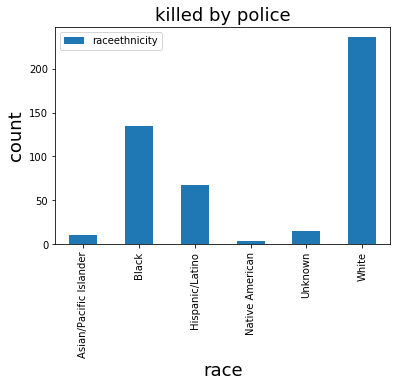

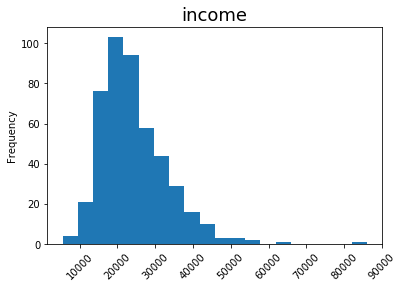

22348.0

In [11]:
raceethnicity.plot(kind='bar')
plt.xlabel('race', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('killed by police', fontsize=18)
plt.show()

p_income = police.p_income[police.p_income.apply(lambda x: x.isnumeric())]
p_income.astype(float).plot.hist(bins=20, rot=45)
plt.title('income', fontsize=18)
plt.show()
p_income.median()

### Assignment

- Find the total killings per each state
- Create a new dataframe and remove any "-" from the following columns "share_white", "share_black" and "share_hispanic" 
- Convert the values in those columns to float types
- Find the mean of 'pop', 'county_income' and those 3 columns for the following subsets
    
    lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
    
    highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]

In [20]:
print(police.groupby('state').state.count())
police2 = police[(police.share_white != '-') & (police.share_black != '-') & (police.share_hispanic != '-')]
police2.share_white = police2.share_white.astype(float)
police2.share_black = police2.share_black.astype(float)
police2.share_hispanic = police2.share_hispanic.astype(float)
lowest_states = ["CT", "PA", "IA", "NY", "MA", "NH", "ME", "IL", "OH", "WI"]
highest_states = ["OK", "AZ", "NE", "HI", "AK", "ID", "NM", "LA", "CO", "DE"]
print("\n Lowest states: \n", police2[police2.state.isin(lowest_states)][['pop','county_income','share_white','share_black','share_hispanic']].mean())
print("\n Highest states: \n", police2[police2.state.isin(highest_states)][['pop','county_income','share_white','share_black','share_hispanic']].mean())

state
AK     2
AL     8
AR     4
AZ    25
CA    74
CO    12
CT     1
DC     1
DE     2
FL    29
GA    16
HI     4
IA     2
ID     4
IL    11
IN     8
KS     6
KY     7
LA    11
MA     5
MD    10
ME     1
MI     9
MN     6
MO    10
MS     6
MT     2
NC    10
NE     6
NH     1
NJ    11
NM     5
NV     3
NY    14
OH    10
OK    22
OR     8
PA     7
SC     9
TN     6
TX    46
UT     5
VA     9
WA    11
WI     5
WV     2
WY     1
Name: state, dtype: int64

 Lowest states: 
 pop                4201.660714
county_income     54830.839286
share_white          60.616071
share_black          21.257143
share_hispanic       12.948214
dtype: float64

 Highest states: 
 pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64


C:\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
